In [246]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy.stats import norm

In [247]:
def payoff_call(S,K):
    return np.maximum(S - K, 0)
def payoff_put(S,K):
    return np.maximum(K - S, 0)

In [259]:
b = 2**12
S0 = 100
r = 0.1
sigma = 0.2

K = 150

T = 3
exercise_moments = T * 10
dt = T / exercise_moments

In [260]:
def f(t, x_curr, x_next):
    return 1/(x_next*sigma*np.sqrt(dt*2*np.pi))*np.exp(-(np.log(x_next/x_curr)-(r - 0.5*sigma**2)*dt)**2/(2*sigma**2*dt))

In [261]:
mesh = np.array([np.exp((r - 0.5 * sigma**2) * i * dt + sigma * np.sqrt(i * dt) * norm.ppf(np.arange(2 * b -1, 0, -2)/(2 * b), loc = 0, scale = 1)) for i in range(1, exercise_moments + 1)]).T
mesh = S0 * mesh

In [262]:
#mesh[:,0] = S0 * mesh[:,0]
#for col in range(1, mesh.shape[1]):
#    mesh[:,col] = mesh[:,col-1].mean() * mesh[:,col]

In [263]:
h = payoff_call(mesh, K)

In [264]:
pd.DataFrame(h)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,3.088399,14.215767,24.853816,35.205370,45.390297,55.486611,65.548670,75.616362,...,192.527868,204.026762,215.705933,227.571685,239.630074,251.886952,264.348002,277.018773,289.904703,303.011144
1,0.0,0.0,0.000000,8.277387,17.799655,27.036403,36.098254,45.057115,53.962993,62.852485,...,164.807096,174.729835,184.791937,194.998674,205.355072,215.865952,226.535970,237.369640,248.371360,259.545433
2,0.0,0.0,0.000000,5.437259,14.436844,23.153589,31.693564,40.125681,48.497829,56.845013,...,152.013541,161.229016,170.566693,180.031405,189.627744,199.360102,209.232704,219.249632,229.414856,239.732246
3,0.0,0.0,0.000000,3.534713,12.188207,20.561455,28.757421,36.842984,44.864595,52.856187,...,143.610343,152.368553,161.238296,170.224129,179.330376,188.561157,197.920429,207.412011,217.039601,226.806805
4,0.0,0.0,0.000000,2.095640,10.489536,18.605567,26.544325,34.371132,42.131342,49.858071,...,137.342857,145.763893,154.288820,162.921996,171.667549,180.529407,189.511335,198.616957,207.849784,217.213227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4092,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4093,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4094,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [265]:
def weights(t, x_curr_mesh, x_next_mesh):
    b = x_curr_mesh.shape[0]
    f_x_mesh = []
    for x_curr in x_curr_mesh:
        f_x_mesh.append(f(t, x_curr, x_next_mesh)) #wektor (b,1)
    g_x_mesh = 1/b * sum(f_x_mesh)
    f_x_mesh = np.array(f_x_mesh)
    return f_x_mesh / g_x_mesh

In [266]:
Q = h.copy()
for i in range(1,Q.shape[1]):
    w = weights(T - i*dt, mesh[:,-(i+1)], mesh[:,-i])
    Q_new = (w * Q[:,-i]).mean(axis = 1)
    Q[:,-(i+1)] = np.maximum(Q[:,-(i+1)],np.exp(-r * dt) * Q_new)
V = np.maximum(payoff_call(S0,K),np.exp(-r * dt) * Q[:,0].mean())

In [267]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,24.019135,32.887511,41.471101,50.183918,59.146639,68.402218,77.964287,87.832856,98.000562,108.455475,...,2.357188e+02,2.473364e+02,2.586347e+02,2.694613e+02,2.796036e+02,2.887323e+02,2.961955e+02,3.013428e+02,3.037588e+02,303.011144
1,22.827316,31.139124,39.119434,47.066715,55.050403,63.083051,71.157896,79.260826,87.375059,95.483242,...,1.804205e+02,1.875961e+02,1.947270e+02,2.018803e+02,2.091951e+02,2.170068e+02,2.265360e+02,2.373696e+02,2.483714e+02,259.545433
2,22.173252,30.007766,37.413259,44.667618,51.845106,58.971181,66.055441,73.101716,80.111765,87.086793,...,1.625389e+02,1.695593e+02,1.767345e+02,1.841497e+02,1.919429e+02,2.003353e+02,2.092773e+02,2.192496e+02,2.294149e+02,239.732246
3,21.714565,29.190436,36.177471,42.955250,49.611936,56.188689,62.710020,69.192996,75.650661,82.093512,...,1.542272e+02,1.612049e+02,1.683702e+02,1.757898e+02,1.835548e+02,1.917597e+02,2.003452e+02,2.090244e+02,2.177669e+02,226.806805
4,21.359266,28.552082,35.219165,41.647199,47.937090,54.141643,60.294680,66.420165,72.535879,78.655264,...,1.484191e+02,1.552512e+02,1.622643e+02,1.695076e+02,1.770356e+02,1.848746e+02,1.929584e+02,2.011007e+02,2.092622e+02,217.213227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,3.371391,1.947768,1.195063,0.746791,0.467201,0.289650,0.176593,0.105162,0.060761,0.033821,...,6.535659e-08,3.907559e-09,1.083843e-10,9.534347e-13,1.343959e-15,7.778755e-20,7.778577e-27,1.028497e-40,5.456773e-82,0.000000
4092,3.279538,1.865535,1.128243,0.694872,0.428207,0.261291,0.156645,0.091627,0.051936,0.028318,...,3.326038e-08,1.778501e-09,4.274334e-11,3.106750e-13,3.353372e-16,1.300972e-20,6.681477e-28,2.331615e-42,2.276738e-85,0.000000
4093,3.162381,1.762473,1.045971,0.632051,0.381825,0.228130,0.133727,0.076364,0.042181,0.022368,...,1.349672e-08,6.215118e-10,1.232897e-11,6.940397e-14,5.240151e-17,1.189832e-21,2.503643e-29,1.467700e-44,6.803546e-90,0.000000
4094,2.995920,1.619525,0.934725,0.549279,0.322273,0.186641,0.105794,0.058259,0.030939,0.015720,...,3.448617e-09,1.265987e-10,1.876813e-12,7.167854e-15,3.145465e-18,3.166577e-23,1.718944e-31,6.713279e-48,9.219081e-97,0.000000


In [268]:
V

9.614810625261457

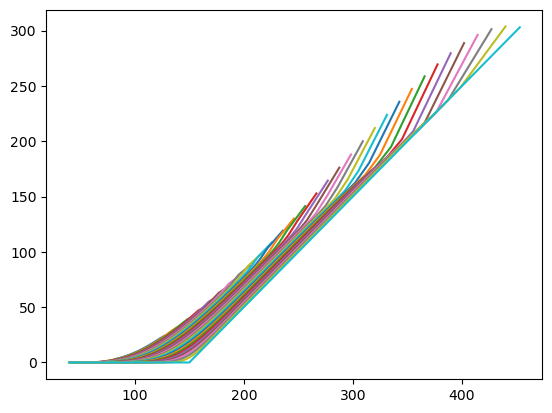

In [269]:
for i in range(Q.shape[1]):
    plt.plot(mesh[:-1,i],Q[:-1,i])